In [21]:
import yfinance as yf
import pandas as pd
import os

In [23]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [25]:
sp500.index = pd.to_datetime(sp500.index)

In [27]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


<Axes: xlabel='Date'>

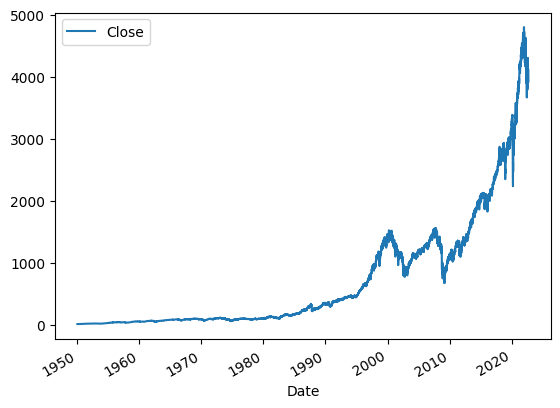

In [29]:
sp500.plot.line(y="Close", use_index=True)

In [33]:
if "Dividends" in sp500.columns:
    del sp500["Dividends"]

if "Stock Splits" in sp500.columns:
    del sp500["Stock Splits"]


In [35]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [37]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [39]:
sp500 = sp500.loc["1990-01-01":].copy()

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [73]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5121951219512195

<Axes: xlabel='Date'>

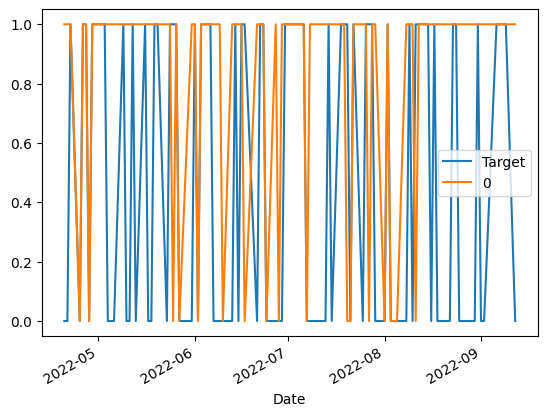

In [88]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()